In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import math
import nltk, re, pprint

In [2]:
# Import an NLTK toeknizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [4]:
# Loop through each text and read in words and sentences, also combine each together into a big list combining all texts
Ntext=6
tokens_words={}
tokens_sents={}
tokens_allwords=[]
tokens_allsents=[]
for itext in np.arange(0,Ntext):
	path = '/Users/drgk/code/data_science/eigen_technologies/test_docs/doc%s.txt'%(itext+1)
	f = open(path)
	raw = f.read()
	tokens_words['text%s'%(itext+1)] = []
	tokens_sents['text%s'%(itext+1)] = []
	tokens_words['text%s'%(itext+1)] = tokenizer.tokenize(raw.decode('utf-8'))
	tokens_sents['text%s'%(itext+1)] = nltk.sent_tokenize(raw.decode('utf-8'))
	tokens_allwords.extend(tokens_words['text%s'%(itext+1)])
	tokens_allsents.extend(tokens_sents['text%s'%(itext+1)])
	f.close()


In [5]:
# Use a frequency distribution to list words by how commonly they appear across all texts
fdist_allwords = nltk.FreqDist(tokens_allwords)
most_common_allwords=fdist_allwords.most_common()


In [6]:
# Split up the output into words and counts
count_most_common=[]
words_most_common=[]
for index, item in enumerate(most_common_allwords):
	count_most_common.append(item[1])
	words_most_common.append(item[0])
count_most_common=np.asanyarray(count_most_common)


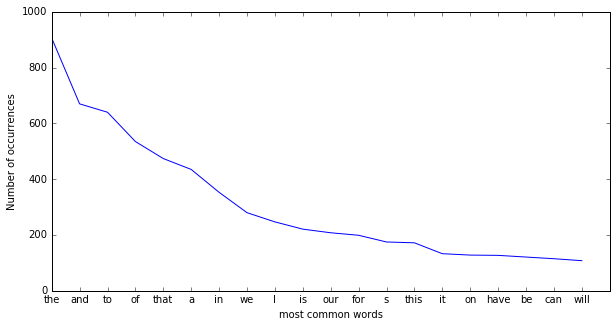

In [7]:
# Plot the top N words and their frequency - unsurprisingly they are quite common parts of speech
Nplot=20
plt.figure(figsize=(10,5))
plt.plot(count_most_common[:Nplot])
plt.xticks(np.arange(0,Nplot),words_most_common[:20])
plt.xlabel('most common words')
plt.ylabel('Number of occurrences')
plt.ylim([0,1000])
plt.show()


In [20]:
# For each word, check in which texts it occurs
text_occurrences = np.zeros([len(count_most_common),6],dtype=bool)
for itext in np.arange(0,6):
	print 'Checking text %s out of 6'%(itext+1)
	for iword in np.arange(0,len(count_most_common)):
		if words_most_common[iword] in tokens_words['text%s'%(itext+1)]:
			text_occurrences[iword,itext]=True


Checking text 1 out of 6
Checking text 2 out of 6
Checking text 3 out of 6
Checking text 4 out of 6
Checking text 5 out of 6
Checking text 6 out of 6


In [128]:
# Now put it all together - create a data structure that tracks each word, the total number of occurrences, which texts
# it appears in and all the sentences where the word occurs.
k=0
import csv
outfile=open('/Users/drgk/code/data_science/eigen_technologies/output.csv', 'wb')
csv_writer = csv.writer(outfile)
Nwords=len(words_most_common)
word_list_full=[]
document_list_full=[]
sent_list_full=[]
for word in words_most_common:
    print str(100*(k+1)/float(Nwords))+' percent complete'
    #print word, count_most_common[k]
    word_sent_count=0
    sents_for_word=[]
    for sent in tokens_allsents:
    # if word in sent:
        if re.search(r"\b" + re.escape(word) + r"\b", sent): # NB - need to avoid catching words when they are only part of a larger word e.g. when looking for 'red' we don't want to find 'redact'
            word_sent_count+=1
            sents_for_word.append(sent)
            sent_list_full.append(sent)
            if word_sent_count==1:
                word_list_full.append(str(word)+', '+str(count_most_common[k]))
                document_list_full.append(str([i+1 for i, x in enumerate(text_occurrences[k,:]) if x]))
            else:
                word_list_full.append('')
                document_list_full.append('')
    csv_writer.writerow([word,[i+1 for i, x in enumerate(text_occurrences[k,:]) if x],sents_for_word])
    k+=1


0.0289268151577 percent complete
0.0578536303153 percent complete
0.086780445473 percent complete
0.115707260631 percent complete
0.144634075788 percent complete
0.173560890946 percent complete
0.202487706104 percent complete
0.231414521261 percent complete
0.260341336419 percent complete
0.289268151577 percent complete
0.318194966734 percent complete
0.347121781892 percent complete
0.376048597049 percent complete
0.404975412207 percent complete
0.433902227365 percent complete
0.462829042522 percent complete
0.49175585768 percent complete
0.520682672838 percent complete
0.549609487995 percent complete
0.578536303153 percent complete
0.607463118311 percent complete
0.636389933468 percent complete
0.665316748626 percent complete
0.694243563784 percent complete
0.723170378941 percent complete
0.752097194099 percent complete
0.781024009257 percent complete
0.809950824414 percent complete
0.838877639572 percent complete
0.86780445473 percent complete
0.896731269887 percent complete
0.925658

In [124]:
# Put the results into a pandas dataframe
data_df = pd.DataFrame({'Sentences': sent_list_full,'Words #': word_list_full, 'Documents': document_list_full})

In [125]:
# rearrange the columns
cols=data_df.columns
cols_rearrange=np.zeros_like(cols)
cols_rearrange[0]=cols[2]
cols_rearrange[1]=cols[0]
cols_rearrange[2]=cols[1]
data_df=data_df[cols_rearrange]

In [131]:
# Display the table
data_df
# NB - the number of sentences for each word DO NOT match the number of occurrences for that word: 
# a word can appear more than once in the same sentence!

,Words #,Documents,Sentences
0,"the, 906","[1, 2, 3, 4, 5, 6]",Let me begin by saying thanks to all you who'v...
1,,,"In the face of war, you believe there can be p..."
2,,,"In the face of despair, you believe there can ..."
3,,,"In the face of a politics that's shut you out,..."
4,,,That's the journey we're on today.
5,,,"And I accepted the job, sight unseen, motivate..."
6,,,I saw that the problems people faced weren't s...
7,,,It was in these neighborhoods that I received ...
8,,,"After three years of this work, I went to law ..."
9,,,"I became a civil rights lawyer, and taught con..."


In [132]:
# write the table to disc as an excel sheet
writer = pd.ExcelWriter('/Users/drgk/code/data_science/eigen_technologies/output.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
data_df.to_excel(writer, sheet_name='Sheet1')
writer.save()